<a href="https://colab.research.google.com/github/Shymori/Regression_fastfood_dataset_analysis_and_prediction/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das bibliotecas e leitura dos dados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
dados = pd.read_csv('fastfood_calories.csv',sep=',')

#Visualizando os dados

Utilizei a função *head()* e *describe()* para ter uma breve visualização dos dados que estarei trabalhando, neste caso observei as colunas e pude identificar quais tipos de dados elas tem (numéricos ou nominais).
Também foi possível uma visão de estatística descritiva dos quartis e média e desvio padrão para entender melhor o comportamento dos meus dados e ver se não encontro nada de errado nesta parte.

In [3]:
dados.head()

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
dados.describe(include='all')

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
count,515.000000,515,515,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000,515
unique,NaN,8,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,Taco Bell,Crispy Chicken Sandwich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
freq,NaN,115,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515
mean,258.000000,NaN,NaN,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459,NaN
std,148.811962,NaN,NaN,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073,NaN
min,1.000000,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,129.500000,NaN,NaN,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000,NaN
50%,258.000000,NaN,NaN,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000,NaN
75%,386.500000,NaN,NaN,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000,NaN


Com a função *info()* eu consegui ver qual é o tamanho do meu dataset (515x18) e percebi que tenho alguns dados null nas colunas:
* "fiber":12,
* "protein":1,
* "vit_a":214,
* "vit_c":210,
* "calcium":210

Dessa forma eu já sei que posso ter que fazer o tratamento desses dados.

In [5]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [6]:
dados.isnull().sum()

Unnamed: 0       0
restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

#Analise Exploratoria

Para entender a relação entre os dados usarem a função corr() dessa forma pode se tornar mais fácil excluir colunas desnecessárias e focar nas principais para resolver meu problema.


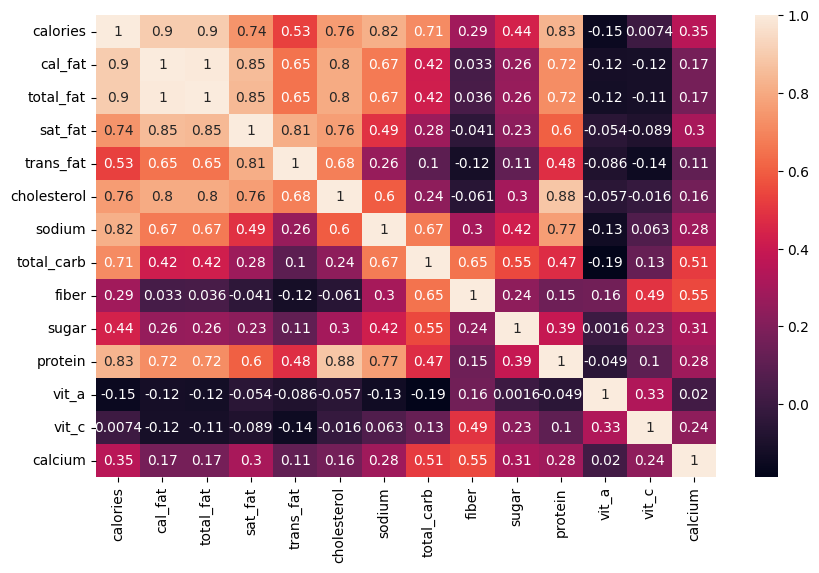

In [7]:
import matplotlib.pyplot as plt

dados_relacionais = dados.drop("Unnamed: 0",axis=1).corr(numeric_only=True).round(4) #criando o mapa relacional sem a coluna Unnamed: 0, pois seus dados são arbitrários
plt.figure(figsize=(10, 6))
sns.heatmap(dados_relacionais, annot=True,xticklabels=dados_relacionais.columns,yticklabels=dados_relacionais.columns)

plt.show()

No gráfico acima não estamos considerando: "restaurant", "item" e "salad", então vamos dar uma olhada nessas variáveis.

Verificamos que "salad" só possui "other", então não será útil para nosso projeto.
"item" também não vai ser muito útil, visto que tem muitas opções e acaba não valendo a pena corrigir

In [8]:
nominais = dados[['restaurant', 'item', 'salad']]
print(nominais.head(20))

   restaurant                                           item  salad
0   Mcdonalds               Artisan Grilled Chicken Sandwich  Other
1   Mcdonalds                 Single Bacon Smokehouse Burger  Other
2   Mcdonalds                 Double Bacon Smokehouse Burger  Other
3   Mcdonalds      Grilled Bacon Smokehouse Chicken Sandwich  Other
4   Mcdonalds       Crispy Bacon Smokehouse Chicken Sandwich  Other
5   Mcdonalds                                        Big Mac  Other
6   Mcdonalds                                   Cheeseburger  Other
7   Mcdonalds                       Classic Chicken Sandwich  Other
8   Mcdonalds                            Double Cheeseburger  Other
9   Mcdonalds            Double Quarter Pounder® with Cheese  Other
10  Mcdonalds                                  Filet-O-Fish®  Other
11  Mcdonalds                    Garlic White Cheddar Burger  Other
12  Mcdonalds  Grilled Garlic White Cheddar Chicken Sandwich  Other
13  Mcdonalds   Crispy Garlic White Cheddar Chic

In [9]:
dados[['salad', 'calories']].groupby(['salad'], as_index=False).mean().sort_values(by='calories', ascending=False)

,salad,calories
0,Other,530.912621


In [10]:
dados[['restaurant', 'calories']].groupby(['restaurant'], as_index=False).mean().sort_values(by='calories', ascending=False)

,restaurant,calories
4,Mcdonalds,640.350877
5,Sonic,631.698113
1,Burger King,608.571429
0,Arbys,532.727273
3,Dairy Queen,520.238095
6,Subway,503.020833
7,Taco Bell,443.652174
2,Chick Fil-A,384.444444


In [11]:
dados[['item', 'calories']].groupby(['item'], as_index=False).mean().sort_values(by='calories', ascending=False)

,item,calories
18,20 piece Buttermilk Crispy Chicken Tenders,2430.0
38,40 piece Chicken McNuggets,1770.0
10,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600.0
88,American Brewhouse King,1550.0
12,12 piece Buttermilk Crispy Chicken Tenders,1510.0
...,...,...
492,Ultimate Chicken Club,100.0
30,4 Piece Grilled Chicken Nuggets,70.0
199,Chopped Side Salad,70.0
496,Veggie Delite Salad,50.0


Aqui estamos fazendo um pairplot com as variáveis que entendemos com o gráfico anterior que tem mais correlação com nosso target "calories"

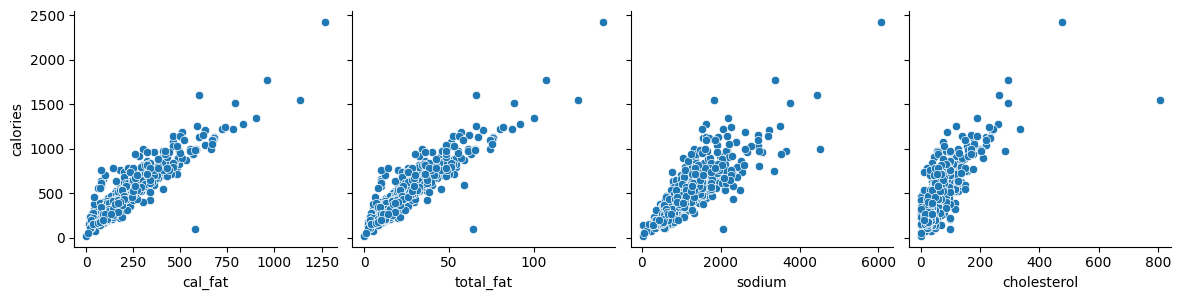

In [12]:
sns.pairplot(data = dados,y_vars = 'calories', x_vars=['cal_fat','total_fat','sodium','cholesterol'], height = 3)

##Vamos agora analisar a distribuição e variação do dataset, buscando outliers, variações, dados nulos e demais informações importantes para os próximos passos

Utilizando boxplots, vamos visualizar os dados do nosso dataset

<Axes: >

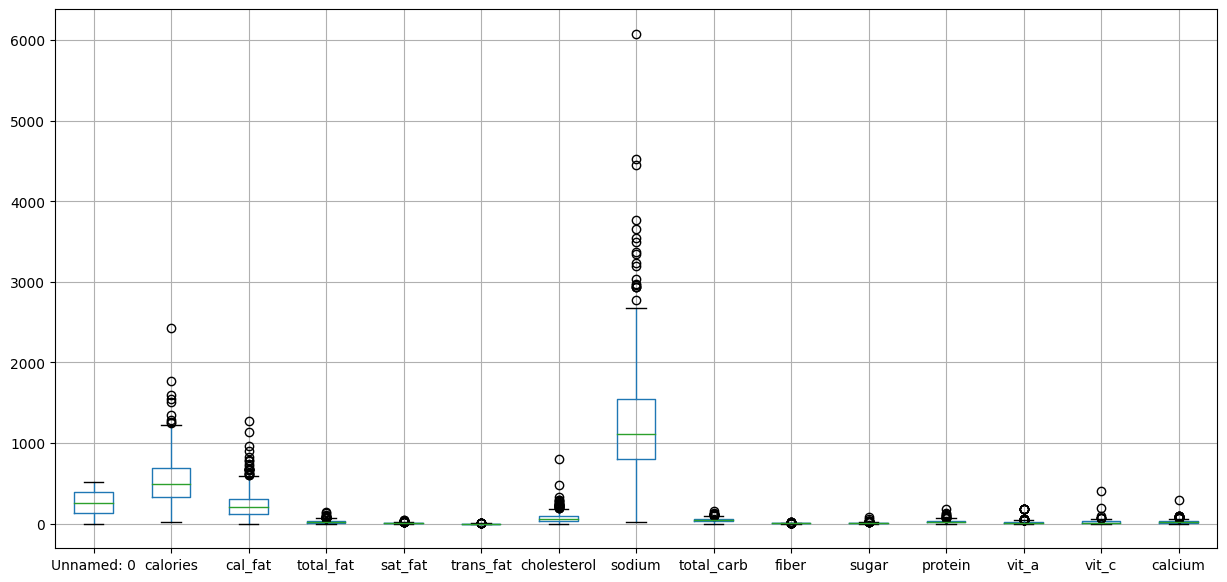

In [13]:
dados.boxplot(figsize=(15,7))

Com esse gráfico podemos validar que as colunas *calories* e *sodium* estão relativamente bem balanceadas, mesmo que com muitos outliers, podemos também validar que nem todos os dados estão na mesma ordem de grandeza

Devido a diferença de escala, podemos observar que o gráfico anterior não facilita a visualação de todos os dados, vamos portanto separar o campo *calories*, *Unnamed: 0*, *sodium*, *cal_fat*, *vit_c* e *calcium* dos demais e regerar o gráfico

In [14]:
dados_sem_calorias = dados.drop(columns=['Unnamed: 0','calories', 'sodium','cholesterol','cal_fat','vit_c','calcium', 'protein', 'sugar'])

<Axes: >

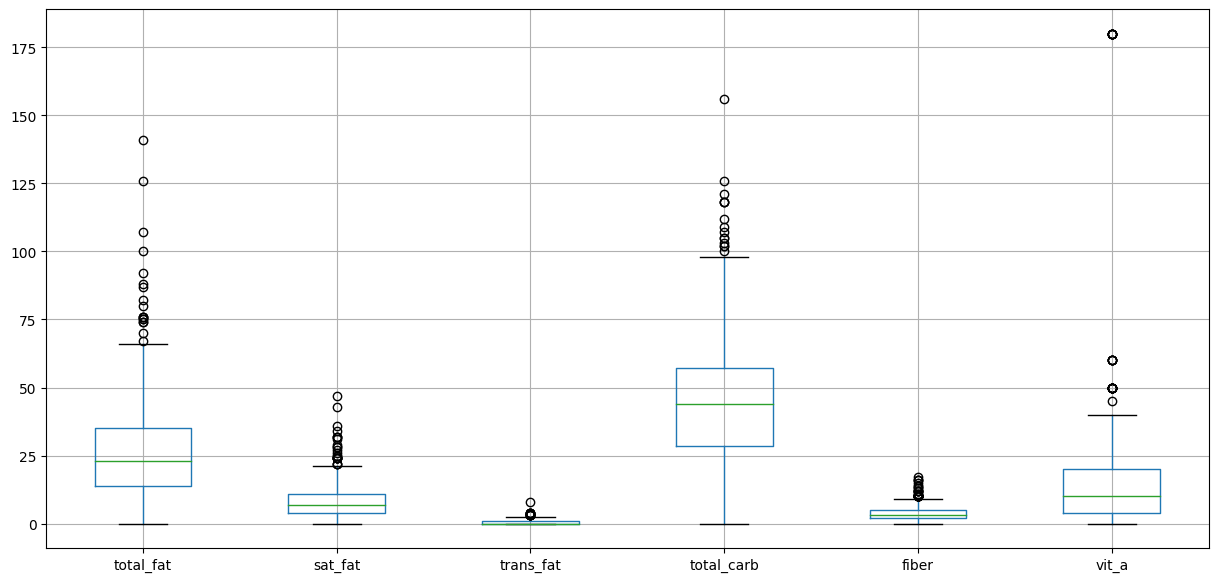

In [15]:
dados_sem_calorias.boxplot(figsize=(15,7))

Agora com o gráfico mais legivel, podemos entender que a coluna *total_carb* esta, relativa aos outros, bem balanceada, mesmo que com muitos outliers, enquanto colunas como *sugar* e *vit_a* estão com uma tendência a esquerda

Vamos portanto utilizar histogramas para validar que as curvas estão desbalanceadas

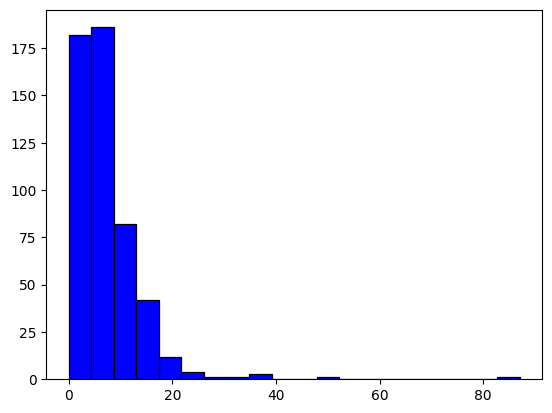

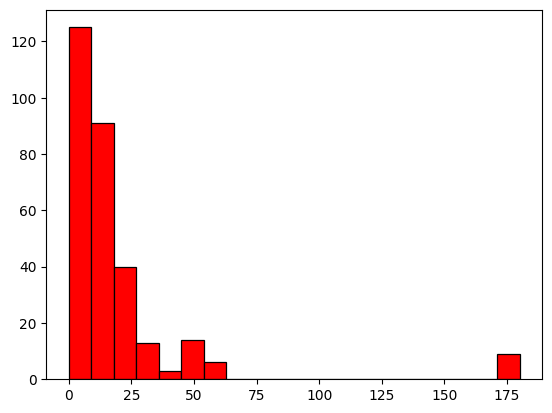

In [16]:
n, bins, patches = plt.hist(dados['sugar'].values, bins=20, color='blue', edgecolor='black', linewidth=0.9)
plt.show()

n, bins, patches = plt.hist(dados['vit_a'].values, bins=20, color='Red', edgecolor='black', linewidth=0.9)
plt.show()

Com isso podemos visualizar que ambas as colunas estão muito pendentes a esquerda

#Pre Processamento

Vamos remover os dados que entendemos ter menos relação com nosso target



In [17]:
dados_filtrados = dados.drop(columns=['Unnamed: 0','fiber','vit_a', 'vit_c','salad','item','total_fat']).copy()
dados_filtrados

,restaurant,calories,cal_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,protein,calcium
0,Mcdonalds,380,60,2.0,0.0,95,1110,44,11,37.0,20.0
1,Mcdonalds,840,410,17.0,1.5,130,1580,62,18,46.0,20.0
2,Mcdonalds,1130,600,27.0,3.0,220,1920,63,18,70.0,50.0
3,Mcdonalds,750,280,10.0,0.5,155,1940,62,18,55.0,20.0
4,Mcdonalds,920,410,12.0,0.5,120,1980,81,18,46.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,780,340,10.0,0.5,50,1850,87,8,23.0,25.0
511,Taco Bell,580,260,9.0,1.0,60,1270,59,7,23.0,NaN
512,Taco Bell,780,380,10.0,1.0,60,1340,74,7,26.0,NaN
513,Taco Bell,720,320,7.0,0.0,70,1260,70,8,32.0,NaN


In [18]:
display(dados_filtrados.corr().round(4))

<ipython-input-18-c8957843b1bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(dados_filtrados.corr().round(4))


,calories,cal_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,protein,calcium
calories,1.0000,0.9017,0.7397,0.5304,0.7625,0.8179,0.7127,0.4377,0.8320,0.3512
cal_fat,0.9017,1.0000,0.8522,0.6484,0.8040,0.6705,0.4194,0.2555,0.7204,0.1668
sat_fat,0.7397,0.8522,1.0000,0.8121,0.7640,0.4875,0.2765,0.2342,0.6036,0.3049
trans_fat,0.5304,0.6484,0.8121,1.0000,0.6809,0.2615,0.1003,0.1127,0.4790,0.1141
cholesterol,0.7625,0.8040,0.7640,0.6809,1.0000,0.5962,0.2387,0.2983,0.8810,0.1624
sodium,0.8179,0.6705,0.4875,0.2615,0.5962,1.0000,0.6720,0.4230,0.7669,0.2849
total_carb,0.7127,0.4194,0.2765,0.1003,0.2387,0.6720,1.0000,0.5470,0.4744,0.5145
sugar,0.4377,0.2555,0.2342,0.1127,0.2983,0.4230,0.5470,1.0000,0.3900,0.3106
protein,0.8320,0.7204,0.6036,0.4790,0.8810,0.7669,0.4744,0.3900,1.0000,0.2845
calcium,0.3512,0.1668,0.3049,0.1141,0.1624,0.2849,0.5145,0.3106,0.2845,1.0000


Depois de filtrarmos os dados, verificaremos se é necessário tratar algum null ou NaN.

Como podemos observar, das colunas que escolhemos, apenas 'protein' e 'calcium' possui dados para serem tratados, portanto utilizamos 'fillna()' para corrigir.

In [19]:
print('dados isnull')
print(dados_filtrados.isnull().sum())
print('dados is nan')
print(dados_filtrados.isna().sum())
dados_filtrados.fillna(0,inplace=True)

dados isnull
restaurant       0
calories         0
cal_fat          0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
sugar            0
protein          1
calcium        210
dtype: int64
dados is nan
restaurant       0
calories         0
cal_fat          0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
sugar            0
protein          1
calcium        210
dtype: int64


Vamos também remover dados de texto, utlizando um mapa para substitui-los por um valor numérico sequencial

In [20]:
replace = {'Mcdonalds':1, 'Chick Fil-A':2, 'Sonic':3, 'Arbys':4, 'Burger King':5,'Dairy Queen':6, 'Subway':7, 'Taco Bell':8}
dados_filtrados['restaurant'] = dados_filtrados['restaurant'].replace(replace)

Agora vamos remover outliers

In [21]:
from scipy import stats

dados_filtrados[(np.abs(stats.zscore(dados_filtrados)) < 3).all(axis=1)]

,restaurant,calories,cal_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,protein,calcium
0,1,380,60,2.0,0.0,95,1110,44,11,37.0,20.0
1,1,840,410,17.0,1.5,130,1580,62,18,46.0,20.0
3,1,750,280,10.0,0.5,155,1940,62,18,55.0,20.0
4,1,920,410,12.0,0.5,120,1980,81,18,46.0,20.0
5,1,540,250,10.0,1.0,80,950,46,9,25.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
510,8,780,340,10.0,0.5,50,1850,87,8,23.0,25.0
511,8,580,260,9.0,1.0,60,1270,59,7,23.0,0.0
512,8,780,380,10.0,1.0,60,1340,74,7,26.0,0.0
513,8,720,320,7.0,0.0,70,1260,70,8,32.0,0.0


<Axes: >

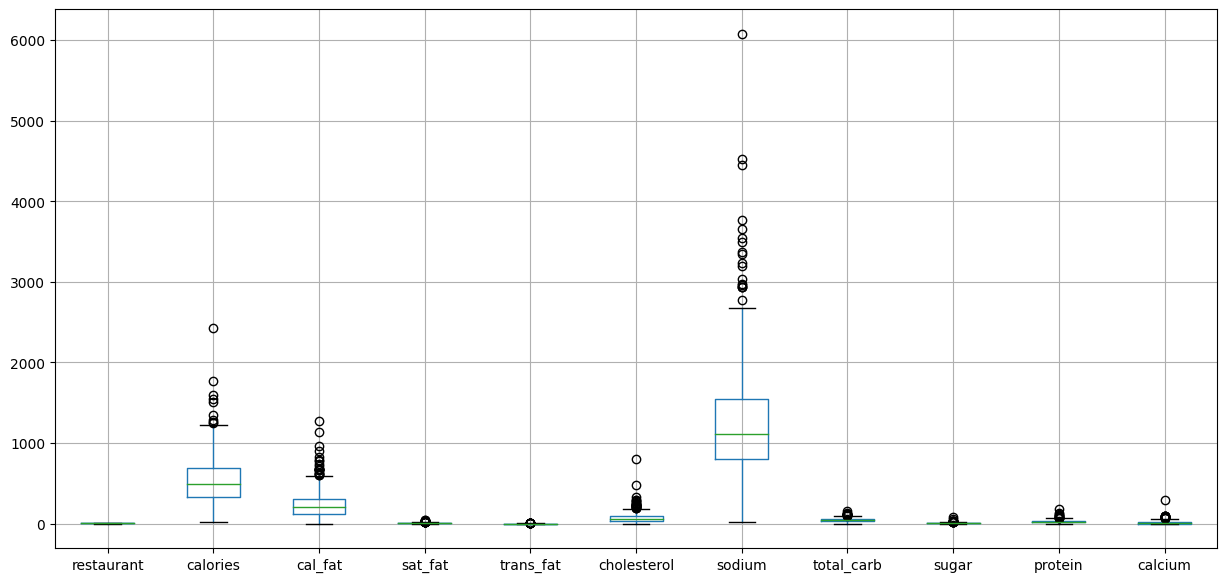

In [22]:
dados_filtrados.boxplot(figsize=(15,7))

#Treinamento dos modelos

Vamos primeiramente separar **X** e **y** no nosso dataset\
Sendo **X** todos os dados *menos* calorias e sendo **y** *calorias*

In [23]:
X_columns = dados_filtrados.columns.tolist()
X_columns.remove('calories')

display(X_columns)

X = dados_filtrados[X_columns]
y = dados_filtrados.calories
display(X.shape)
display(y.shape)

['restaurant',
 'cal_fat',
 'sat_fat',
 'trans_fat',
 'cholesterol',
 'sodium',
 'total_carb',
 'sugar',
 'protein',
 'calcium']

(515, 10)

(515,)

--

##  Redes Neurais

Aqui vamos utilizar o modelo de rede neural com auxilio do `keras.sequential`, para concatenar varias camadas densas com ativação de ReLU, ou seja, de ativação não linear ( `a(x) = x)` )

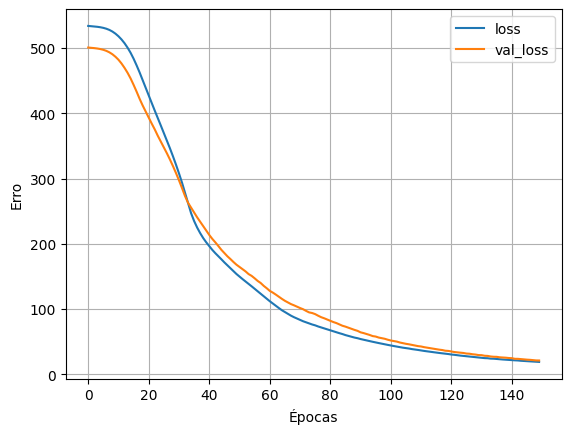

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split


import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1)
])


model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('mae keras',mae)
print('R2 keras',r2)


5/5 [==============================] - 0s 3ms/step
mae keras 29.83267802576865
R2 keras 0.9069638461888991


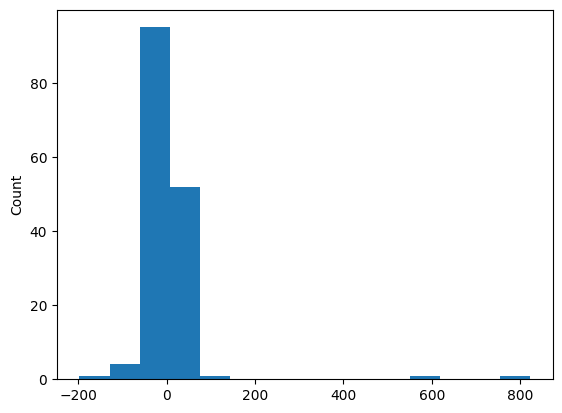

In [26]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

## Regressão Linear

Aqui vamos utlizar o modelo de regressão linear do keras, se baseando em MSE para definir a melhor reta

In [27]:
from sklearn.linear_model import LinearRegression

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

model.fit(
    X_train, y_train,
    epochs=150,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("R2 = ",r2)

5/5 [==============================] - 0s 3ms/step
MAE =  35.08231023973034
R2 =  0.9626438574533523


## Arvore de decisões

Aqui vamos utilizar a Arvore de Decisão do SKlearn, ela se baseia em MAE para decidir o melhor node, ou seja, quando for decidir qual deveria ser o proximo valor a ser levado em consideração para decisão do melhor node, ela calcula o erro médio quadratico e decide a partir disso

Essa árvore expande automaticamente até que o numéro de nodes possíveis a partir de um ponto seja menor que 2, ou atinja a profundidade máxima de 7

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor(random_state=0, max_depth=7)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("R2 = ",r2)

MAE =  45.71431733983917
R2 =  0.9272351266848923
